In [60]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Connection between Population and Atheletes' Performance





In [61]:
Population = pd.read_csv('athletePopulation.csv')

In [62]:
events = pd.pivot_table(Population,  index = ['Country', 'Year','Population'], columns = 'Medal', values = 'Medal_Won', aggfunc = 'sum',fill_value = 0).drop('DNW', axis = 1).reset_index()

events['Grade'] = np.where((events['Gold']>0) | (events['Silver']>0) | (events['Bronze']>0), events['Gold']*3+events['Silver']*2+events['Bronze'],0)


events.head()

Medal,Country,Year,Population,Bronze,Gold,Silver,Grade
0,Afghanistan,1960,8996351.0,0,0,0,0
1,Afghanistan,1964,9731361.0,0,0,0,0
2,Afghanistan,1968,10604346.0,0,0,0,0
3,Afghanistan,1972,11721940.0,0,0,0,0
4,Afghanistan,1980,13248370.0,0,0,0,0


In [63]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# calculate the R_Squared values 

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    b = mean(ys) - m*mean(xs)
    return m, b

def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

In [64]:
grade = events['Grade'] > 0

correlation = events.loc[grade, ['Population', 'Grade']].corr()['Grade'][0]

print(correlation)

m, b = best_fit_slope_and_intercept(events['Grade'],events['Population'])
regression_line = [(m*x)+b for x in events['Grade']]

r_squared = coefficient_of_determination(events['Population'],regression_line)
print(r_squared)

0.23717357841644324
0.0617421109806946


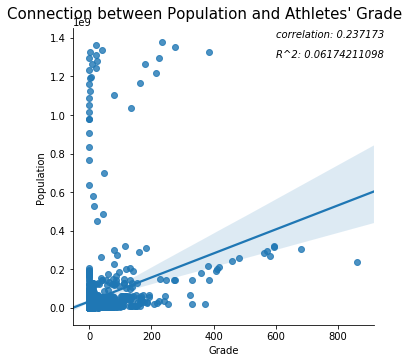

In [65]:
sns.lmplot(x="Grade", y="Population",data=events)
plt.text(600,1400000000, "correlation: 0.237173" , fontsize = 10, color='black', fontstyle='italic')
plt.text(600,1300000000, "R^2: 0.06174211098" , fontsize = 10, color='black', fontstyle='italic')
plt.suptitle('Connection between Population and Athletes\' Grade', size=15, y=1);      

In [66]:
# find the top contries that won most total medals 

medal_total = Population.groupby(['Year','Country','Population'])['Medal_Won'].agg('sum').reset_index()
medal_total = medal_total.loc[medal_total['Medal_Won'] > 0, :]
medal_total_pivot = pd.pivot_table(medal_total,
                     index = 'Country',
                     columns = 'Year',
                     values = 'Medal_Won',
                     aggfunc = 'sum',
                     margins = True).sort_values('All', ascending = False)[1:5]

medal_total_pivot.loc[:,'All']

Country
USA          3623
Australia    1153
Russia       1132
China         985
Name: All, dtype: int64

In [67]:
countries = ['USA', 'Australia', 'Russia']
top_countries = events[events.Country.isin(countries)]
top_countries.head()

Medal,Country,Year,Population,Bronze,Gold,Silver,Grade
69,Australia,1960,10276477.0,11,10,21,83
70,Australia,1964,11167000.0,26,8,3,56
71,Australia,1968,12009000.0,11,5,35,96
72,Australia,1972,13177000.0,2,11,7,49
73,Australia,1976,14033000.0,7,0,15,37


In [68]:
# normalize population data  
a = top_countries.pivot(index='Year', columns='Country', values='Population').reset_index()
a["Australia"] = a["Australia"] / a["Australia"].max()
a["Russia"] = a["Russia"] / a["Russia"].max()
a["USA"] = a["USA"] / a["USA"].max()
a.head()

Country,Year,Australia,Russia,USA
0,1960,0.425930,NaN,0.559132
1,1964,0.462839,NaN,0.593849
2,1968,0.497738,NaN,0.621136
3,1972,0.546148,NaN,0.649576
4,1976,0.581627,NaN,0.674765


In [69]:
normalized_df = a.melt(id_vars=['Year'], var_name='Country')
normalized_df = pd.merge(normalized_df, top_countries, left_on = ['Country', 'Year'], right_on = ['Country', 'Year'])

normalized_df = normalized_df.rename(columns={"value": "normalized_Population"})
normalized_df.head()

,Year,Country,normalized_Population,Population,Bronze,Gold,Silver,Grade
0,1960,Australia,0.425930,10276477.0,11,10,21,83
1,1964,Australia,0.462839,11167000.0,26,8,3,56
2,1968,Australia,0.497738,12009000.0,11,5,35,96
3,1972,Australia,0.546148,13177000.0,2,11,7,49
4,1976,Australia,0.581627,14033000.0,7,0,15,37


In [70]:
Australia = normalized_df[normalized_df['Country'] == 'Australia']
Russia = normalized_df[normalized_df['Country'] == 'Russia']
USA = normalized_df[normalized_df['Country'] == 'USA']

m, b = best_fit_slope_and_intercept(USA['Grade'],USA['normalized_Population'])
regression_line = [(m*x)+b for x in USA['Grade']]
m2, b2 = best_fit_slope_and_intercept(Russia['Grade'],Russia['normalized_Population'])
regression_line2 = [(m2*x)+b2 for x in Russia['Grade']]
m3, b3 = best_fit_slope_and_intercept(Australia['Grade'],Australia['normalized_Population'])
regression_line3 = [(m3*x)+b3 for x in Australia['Grade']]

r_squared = coefficient_of_determination(USA['normalized_Population'],regression_line)
print(r_squared)
r_squared2 = coefficient_of_determination(Russia['normalized_Population'],regression_line2)
print(r_squared2)
r_squared3 = coefficient_of_determination(Australia['normalized_Population'],regression_line3)
print(r_squared3)

0.0007720856305344359
0.0017054976967449953
0.052074482736766736


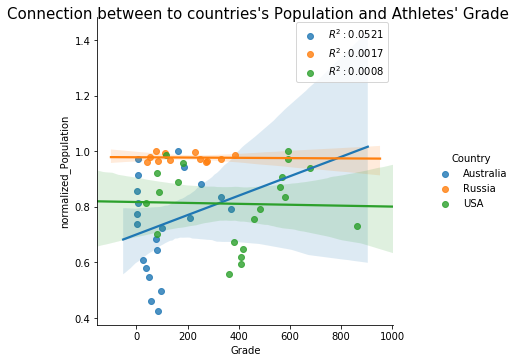

In [71]:
p = sns.lmplot(x="Grade", y="normalized_Population", hue="Country", data=normalized_df)
ax = p.axes[0, 0]
ax.legend()
leg = ax.get_legend()
L_labels = leg.get_texts()
# assuming you computed r_squared which is the coefficient of determination somewhere else
label_line_1 = r'$R^2:{0:.4f}$'.format(r_squared)
label_line_2 = r'$R^2:{0:.4f}$'.format(r_squared2) 
label_line_3 = r'$R^2:{0:.4f}$'.format(r_squared3) 

L_labels[0].set_text(label_line_3)
L_labels[1].set_text(label_line_2)
L_labels[2].set_text(label_line_1)


plt.suptitle('Connection between to countries\'s Population and Athletes\' Grade', size=15, y=1);      



# Connection between Population and Atheletes' Performance

In [72]:
determineDF = pd.read_csv('athleteGDP.csv')

In [73]:
events = pd.pivot_table(determineDF,
                                      index = ['Country', 'Games Year','Games Year GDP'],
                                      columns = 'Medal',
                                      values = 'Medal_Won',
                                      aggfunc = 'sum',
                                     fill_value = 0).drop('DNW', axis = 1).reset_index()


events['Grade'] = np.where((events['Gold']>0) | (events['Silver']>0) | (events['Bronze']>0), events['Gold']*3+events['Silver']*2+events['Bronze'],0)


events.head()

Medal,Country,Games Year,Games Year GDP,Bronze,Gold,Silver,Grade
0,Afghanistan,1964,5.377778e+08,0,0,0,0
1,Afghanistan,1968,8.000000e+08,0,0,0,0
2,Afghanistan,1972,1.373333e+09,0,0,0,0
3,Afghanistan,1980,2.555556e+09,0,0,0,0
4,Afghanistan,2008,5.285466e+09,1,0,0,1


In [74]:
Grade = events['Grade'] > 0

correlation = events.loc[Grade, ['Games Year GDP', 'Grade']].corr()['Grade'][0]
m, b = best_fit_slope_and_intercept(events['Grade'],events['Games Year GDP'])
regression_line = [(m*x)+b for x in events['Grade']]

r_squared = coefficient_of_determination(events['Games Year GDP'],regression_line)
print(r_squared)
print(correlation)

0.343791151050279
0.5553541728082964


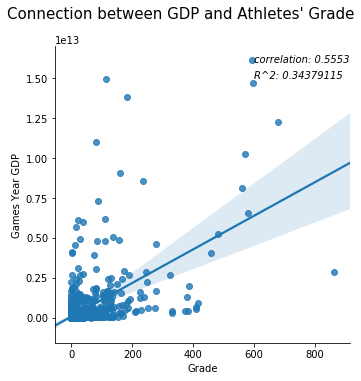

In [75]:
p = sns.lmplot(x="Grade", y="Games Year GDP",  data=events)
ax = p.axes[0, 0]

# assuming you computed r_squared which is the coefficient of determination somewhere else
plt.text(600,16000000000000, "correlation: 0.5553" , fontsize = 10, color='black', fontstyle='italic')
plt.text(600,15000000000000, "R^2: 0.34379115" , fontsize = 10, color='black', fontstyle='italic')
plt.suptitle('Connection between GDP and Athletes\' Grade', size=15, y=1.05);      

In [76]:
events = pd.pivot_table(determineDF,
                                      index = ['Country', 'Games Year','Deter Year GDP'],
                                      columns = 'Medal',
                                      values = 'Medal_Won',
                                      aggfunc = 'sum',
                                     fill_value = 0).drop('DNW', axis = 1).reset_index()
events['Grade'] = np.where((events['Gold']>0) | (events['Silver']>0) | (events['Bronze']>0), events['Gold']*3+events['Silver']*2+events['Bronze'],0)



In [77]:
top_year= ['2016','2012','2008']
top_countries = events[events['Games Year'].isin(top_year)]
top_countries.head()

Medal,Country,Games Year,Deter Year GDP,Bronze,Gold,Silver,Grade
4,Afghanistan,2008,1.019053e+10,1,0,0,1
5,Afghanistan,2012,2.053654e+10,1,0,0,1
6,Afghanistan,2016,1.946902e+10,0,0,0,0
12,Albania,2008,1.288135e+10,0,0,0,0
14,Albania,2012,1.231978e+10,0,0,0,0


In [78]:
c2008 = top_countries[top_countries['Games Year'] == 2008]
c2012 = top_countries[top_countries['Games Year'] == 2012]
c2016 = top_countries[top_countries['Games Year'] == 2016]


m, b = best_fit_slope_and_intercept(c2008['Grade'],c2008['Deter Year GDP'])
regression_line = [(m*x)+b for x in c2008['Grade']]

r_squared = coefficient_of_determination(c2008['Deter Year GDP'],regression_line)
print(r_squared)

m2, b2 = best_fit_slope_and_intercept(c2012['Grade'],c2012['Deter Year GDP'])
regression_line2 = [(m2*x)+b2 for x in c2012['Grade']]

r_squared2 = coefficient_of_determination(c2012['Deter Year GDP'],regression_line2)
print(r_squared2)

m3, b3 = best_fit_slope_and_intercept(c2016['Grade'],c2016['Deter Year GDP'])
regression_line3 = [(m3*x)+b3 for x in c2016['Grade']]

r_squared3 = coefficient_of_determination(c2016['Deter Year GDP'],regression_line3)
print(r_squared3)

0.7915955430353354
0.8218924946214374
0.7184909997194675


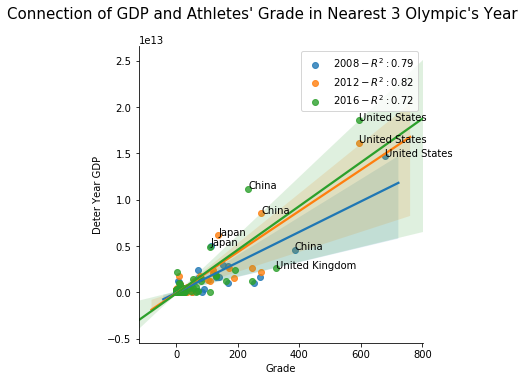

In [79]:
p = sns.lmplot(x="Grade", y="Deter Year GDP", hue="Games Year",legend=False,data=top_countries)
ax = p.axes[0, 0]
ax.legend()
leg = ax.get_legend()
L_labels = leg.get_texts()
# assuming you computed r_squared which is the coefficient of determination somewhere else
label_line_1 = r'$2008 - R^2:{0:.2f}$'.format(r_squared)
label_line_2 = r'$2012 - R^2:{0:.2f}$'.format(r_squared2) 
label_line_3 = r'$2016 - R^2:{0:.2f}$'.format(r_squared3) 

L_labels[0].set_text(label_line_1)
L_labels[1].set_text(label_line_2)
L_labels[2].set_text(label_line_3)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        if point['y'] > 5000000000000 or point['x'] >300:
            ax.text(point['x']+.02, point['y'], str(point['val']))
        
label_point(top_countries['Grade'], top_countries['Deter Year GDP'], top_countries['Country'], plt.gca())  
plt.suptitle('Connection of GDP and Athletes\' Grade in Nearest 3 Olympic\'s Year', size=15, y=1.05);      

